<a href="https://colab.research.google.com/github/vishalkumarsingh999/NLP/blob/main/My_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libary import
---



In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectorsimport pandas as pd
import numpy as np
import re 
import nltk
from sklearn.manifold import TSNE
import plotly.express as px
import matplotlib.pyplot as plt

nltk.download('stopwords')

!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-10-16 10:58:41--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.165.157
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.165.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  72.8MB/s    in 19s     

2021-10-16 10:59:00 (84.5 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



# Download pre-trained model, Loading and checking free space 

In [ ]:
model =KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz',binary=True)

In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        5.2G        3.0G        1.1M        4.5G        7.4G
Swap:            0B          0B          0B


# Input text
# Preprocessing Text 


In [ ]:
x='''China is trying to assuage concerns about skyrocketing prices as its major coal mining hubs grapple with heavy rains and deadly accidents, problems that are compounding efforts to address power shortages.
Some leaders in India, meanwhile, are warning that key regions including the capital, New Delhi, could face a "power crisis" as the cost of electricity rises, even as the central government says the country has enough coal supplies to meet demand.
Energy demand is soaring worldwide as the global economy reopens. But supply isn't keeping up In China, power shortages are the result of a combination of factors, from China's post-pandemic construction boom, to its national push to reduce carbon emissions that led hundreds of coal mines to shut down or slash production earlier this year.
Restrictions on coal from key supplier Australia and weather woes have exacerbated the issue — and the latter issue has been acute this week, as heavy rains slammed Shanxi and Shaanxi provinces, two key mining hubs that account for nearly half of the country's coal output.
An incident involving a collapsed roof at a coal mine in Shaanxi's Xianyang city has made matters worse. The incident — which killed four miners and seriously injured four others, according to state-run Xinhua News Agency — happened days after the provincial government warned all mines to boost safety checks. Xinhua said the local government is still investigating the cause of the collapse.
The price of thermal coal, which is primarily used to generate power, has continued to rise. Futures surged 11% Tuesday on the Zhengzhou Commodity Exchange to a new record of nearly 1,508 yuan ($234) per metric ton. That followed an 8% increase on Monday.
We expect China's coal and power supply crunch to persist into the winter," Citi analysts wrote in a Tuesday research report, adding that the problem would "increase stagflation risks and growth pressures on the Chinese and global economy over the coming winter, [pushing] energy prices higher."
The "extremely abnormal" weather forced 60 coal mines in Shanxi to shut down at the start of this month, according to an article posted Monday on the Ministry of Emergency Management's website. Almost all of them have since resumed production, the Shanxi government said Tuesday, though four remain halted.
The National Reform and Development Commission — China's top economic planner — has tried to calm concerns about the unfolding problem, reiterating Tuesday that the government is going to allow coal-fired power producers to charge more for energy.
Starting Friday, all industrial and commercial energy users will have to buy electricity at "market-oriented" prices, the agency said. Beijing has already made clear that power prices will be allowed to rise by as much as 20% from current base levels, or benchmark prices set by the government. Right now, the limit is 10%.
Residents and the agricultural industry will not be affected, the agency said. In India, meanwhile, state leaders are warning the central government about the risks of a coal shortage.
Over the weekend, Delhi Chief Minister Arvind Kejriwal tweeted that the capital "could face a power crisis," adding that he recently wrote to Prime Minister Narendra Modi to warn him of energy shortages.
Kejriwal called on the government to divert supplies of coal and gas to utilities supplying the capital, saying it was "essential to maintain uninterrupted power in Delhi, which is catering to strategic and important installations of national importance." The chief minister of southern Andhra Pradesh, Jagan Mohan Reddy, also recently told Modi that the situation was "alarming."
Coal stocks at most of India's power plants have dropped to critically low levels.
As many as 61 of the 135 coal-fired power plants in Asia's third largest economy have two days — or less — of coal supplies, India's Central Electricity Authority (CEA) said in a Sunday report. Coal stocks at 16 of them have been run down to zero, it added.
But the Indian government has maintained that it has enough supplies to meet demand.
The total fuel stock at coal-powered plants sits at about 7.2 million metric tons, which is sufficient for four days, the Ministry of Coal said in a Sunday statement. The agency added that government-owned mining giant Coal India has stock of more than 40 million metric tons.
"Any fear of disruption in power supply is entirely misplaced," the ministry said. Nonetheless, the situation in India "remains precarious," analysts at ANZ Research wrote Tuesday. While Coal India says its daily supplies have risen, the analysts noted that some provinces are "getting less than half their contracted volumes" and that power shortages in Punjab and Jharkhand states are worsening.
'''

stp=nltk.corpus.stopwords.words('english')

x=re.sub(r'[.|-|"|\'|]|[|-|,]',r' ',x)
x=re.sub(r'\d',r' ',x)
x=re.sub(r'\W',r' ',x)
l=x.split()
l=[i.lower() for i in l if len(i)>2 and i not in stp]
l=set(l)

In [ ]:
print(l)

{'over', 'any', 'even', 'run', 'that', 'analysts', 'essential', 'city', 'miners', 'fear', 'some', 'getting', 'zhengzhou', 'weekend', 'meanwhile', 'asia', 'woes', 'boost', 'four', 'compounding', 'supply', 'week', 'noted', 'jharkhand', 'energy', 'authority', 'giant', 'nearly', 'power', 'chinese', 'latter', 'major', 'pressures', 'pandemic', 'start', 'industry', 'kejriwal', 'problems', 'provinces', 'plants', 'exacerbated', 'matters', 'involving', 'southern', 'state', 'economic', 'starting', 'restrictions', 'base', 'month', 'shanxi', 'address', 'carbon', 'told', 'grapple', 'meet', 'regions', 'remain', 'supplying', 'anz', 'agricultural', 'almost', 'rise', 'surged', 'also', 'seriously', 'sufficient', 'problem', 'would', 'keeping', 'collapsed', 'rains', 'shortages', 'unfolding', 'central', 'minister', 'australia', 'indian', 'production', 'xianyang', 'market', 'largest', 'rises', 'agency', 'coming', 'third', 'importance', 'according', 'global', 'warn', 'disruption', 'killed', 'entirely', 'cost'

#Getting word-vector from Google-news-model for input text 

In [ ]:
data=np.empty(shape=(1,301))
ll=[]
for i in l:
  try:
    wv=model[i]
    temp1=np.concatenate((np.array([i]),wv),axis=0)
    temp1=temp1.reshape(1,301)
    data=np.vstack((data,temp1))
    ll.append(i)
  except:
    pass
data=data[1:,1:]

In [ ]:
print(data.shape,len(ll))
type(data)

(303, 300) 303


numpy.ndarray

In [180]:
dd.shape

(303, 3)

#Using tSNE to reduce 300 DImensation into 2 Dimension and visualisating on scatter plot

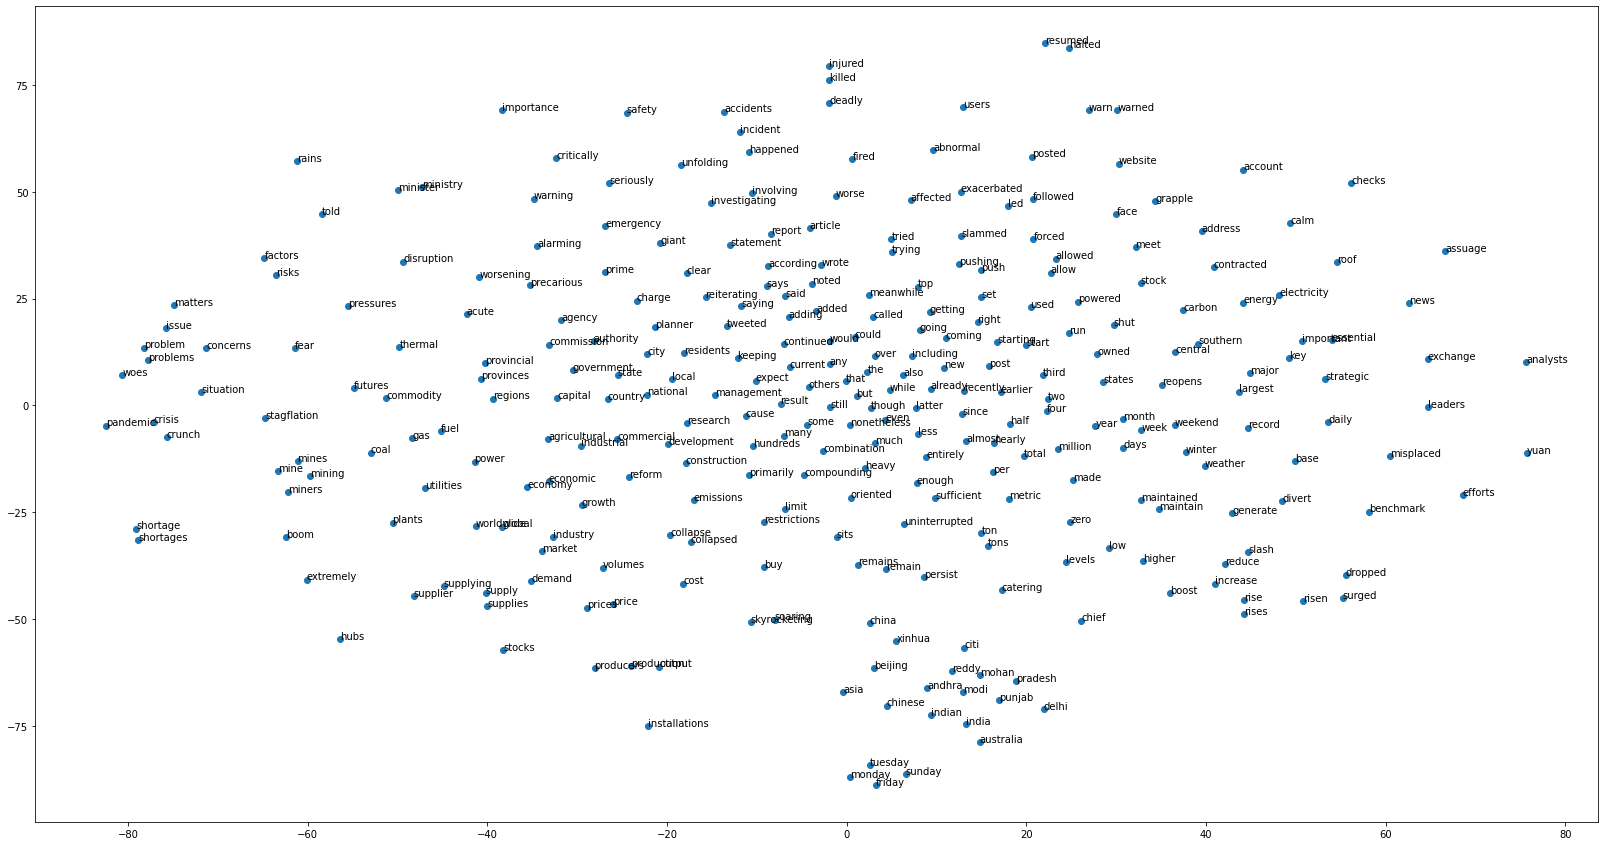

In [199]:
import matplotlib
tmo=TSNE(n_components=2)
dd=tmo.fit_transform(data)

y=dd[:,[0]]
z=dd[:,[1]]

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(ll):
    ax.annotate(txt, (z[i], y[i]))
matplotlib.rc('figure', figsize=(68, 15))

#using tSNE to reduce 300 DImensation into 3 Dimension and visualisating on 3D scatter plot

In [192]:
tmo=TSNE(n_components=3)
dd=tmo.fit_transform(data)


fig=px.scatter_3d(dd,x=0, y=1, z=2)
fig.show()